# 2021 Car Crashes by Zip Code Areas - Boston

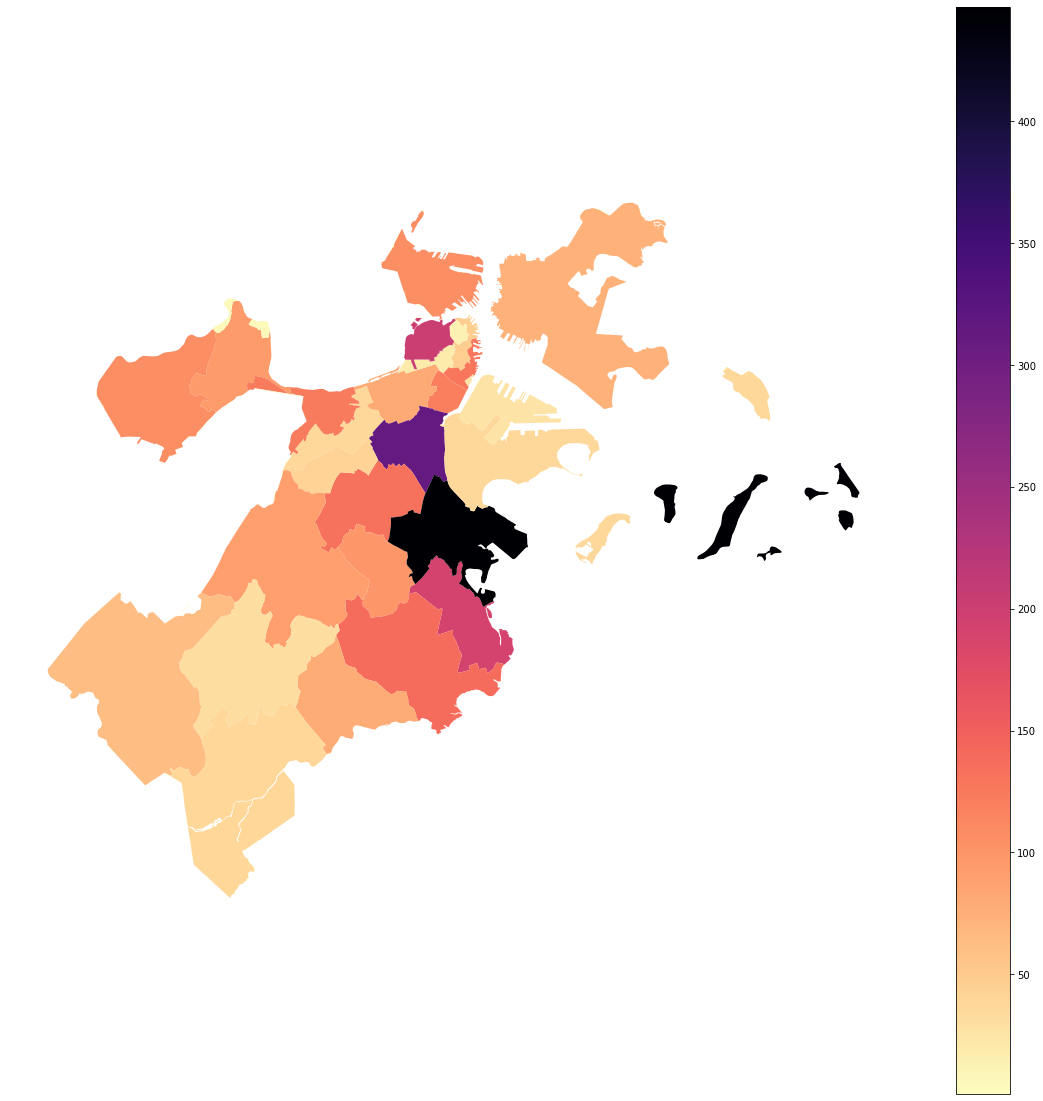

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

#Plot out Boston Boundary from statewide town shapefile
sf_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/MAtownssurvey_shp/TOWNSSURVEY_POLY.shp"
sf = gpd.read_file(sf_path, encoding='utf-8')
bos_sf = sf[sf.TOWN == 'BOSTON']
bos_shape = bos_sf.to_crs({'init': 'epsg:4326'})
bos_shape

#Plot out statewide road data. Select major roads and catogorize them from 1 to 4
road_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/MassDOT_Roads_SHP/EOTROADS_ARC.shp"
roads = gpd.read_file(road_path)
roads = roads.to_crs({'init': 'epsg:4326'})
roads = gpd.sjoin(roads, bos_shape, op="intersects")

main_roads = roads[(roads.CLASS == 1) | (roads.CLASS == 2) | (roads.CLASS == 3) | (roads.CLASS == 4)]


car_crashes_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/XLS/2021_Vehicle_Level_Crash_Details_Boston_EditedV2.csv"
car_crashes = gpd.read_file(car_crashes_path)
df = pd.read_csv(car_crashes_path)
car_crash_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LON, df.LAT))
car_crash_gdf = car_crash_gdf.set_crs({'init': 'epsg:4326'}, allow_override=True)
right = car_crash_gdf

zipcode_area_bos_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/Zipcode_Areas_Boston.shp"
zipcode_area_bos = gpd.read_file(zipcode_area_bos_path)
zipcode_area_bos = zipcode_area_bos.to_crs({'init': 'epsg:4326'})
left = zipcode_area_bos

sjoined_crashes = gpd.sjoin(left, right, how='left', op='intersects')
sjoined_crashes.head()
sjoined_crashes = sjoined_crashes.rename(columns={'index_right': 'crashes'})
sjoined_crashes['crashes'] = sjoined_crashes['crashes'].apply(lambda x: 0 if x== 0 else 1)
sjoined_crashes.crashes.value_counts()
sjoined_crashes = sjoined_crashes.groupby('POSTCODE', as_index='False').agg({'crashes': 'sum', 'geometry': 'first'})
sjoined_crashes = gpd.GeoDataFrame(sjoined_crashes, crs='epsg:4326')
sjoined_crashes.shape

ax = sjoined_crashes.plot(column='crashes', cmap='magma_r', k=5, legend=True)
plt.title = ("2021 Car Crashes by Zip Code Areas - Boston")
ax.set_axis_off()

Project is inspired by Marcelo Rovai